# Data Science Internship at Widhya

## Mission: Covid -19 Analysis (Quantitative Modelling)

**Importing necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

### Data collection & visualization

**Reading the dataset**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')
data

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [3]:
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [4]:
data.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


In [5]:
data.shape

(270, 7)

In [6]:
data.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


In [8]:
data.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

**Grouping data as per dates**

In [9]:
df = data.drop(columns = ['Sno','State/UnionTerritory']).groupby(by = ['Date'],sort = False,as_index = False)
df = df.sum()

In [10]:
df.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,1,0,0,0
1,31/01/20,1,0,0,0
2,01/02/20,2,0,0,0
3,02/02/20,3,0,0,0
4,03/02/20,3,0,0,0


**Adding new columns to the existing dataset**

In [11]:
df['Total cases'] = df.sum(axis=1)

In [12]:
df.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total cases
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3


In [13]:
df.tail()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total cases
47,17/03/20,113,24,14,3,154
48,18/03/20,126,25,14,3,168
49,19/03/20,148,25,20,4,197
50,20/03/20,191,32,23,4,250
51,21/03/20,244,39,23,4,310


**What were the total cases on 04/03/2020**

In [14]:
df.loc[df['Date'] == '04/03/20']

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total cases
34,04/03/20,12,16,3,0,31


**Trend Analysis**

Text(0, 0.5, 'Total Cases')

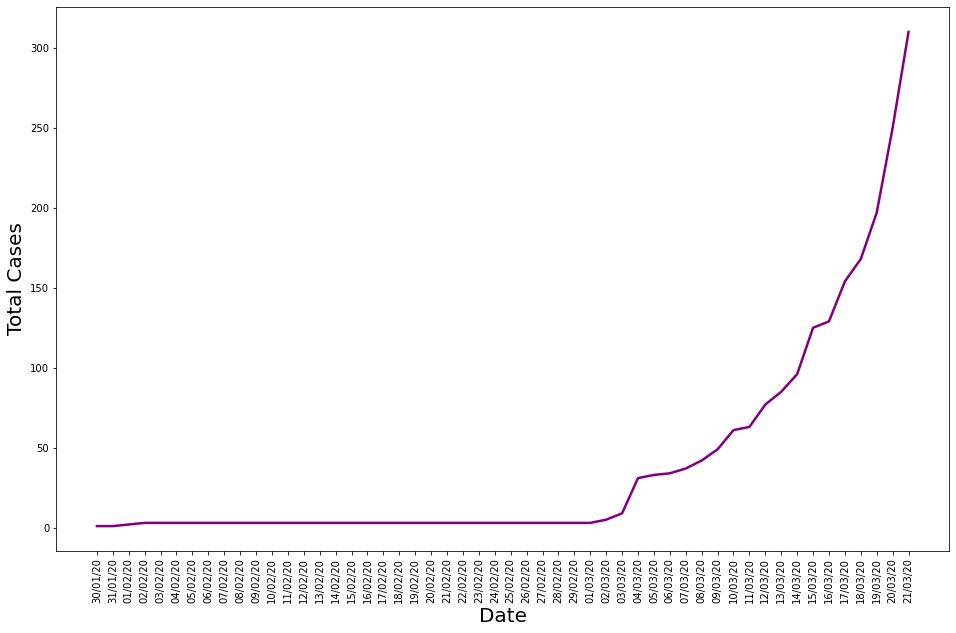

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
ax = plt.plot(df['Date'],df['Total cases'],color = 'purple',linewidth = '2.5')
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Cases',fontsize=20)

**Comparison of Covid cases**

Text(0, 0.5, 'Total Cases')

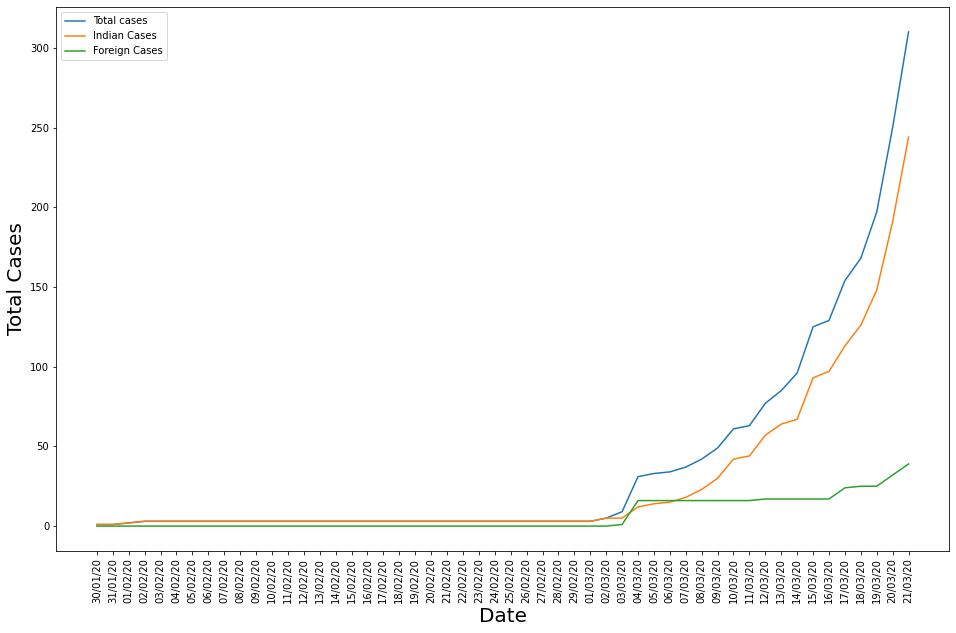

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
ax = plt.plot(df['Date'],df['Total cases'], label="Total cases")
ax = plt.plot(df['Date'],df['ConfirmedIndianNational'],label="Indian Cases")
ax = plt.plot(df['Date'],df['ConfirmedForeignNational'],label="Foreign Cases")
ax = plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Cases',fontsize=20)

### Modeling the solution

**Rate of increase of cases each day**

In [17]:
r = 0.0   
start_date = df.index[df['Date'] == '04/03/20'][0]
end_date = df.index[df['Date'] == '21/03/20'][0]
for i in range(start_date,end_date):
    curr_day_cases = df.iloc[i]['Total cases']
    next_day_cases = df.iloc[i + 1]['Total cases']
    daily_rate = (next_day_cases - curr_day_cases) / curr_day_cases
    r += daily_rate
r /= (end_date - start_date)

In [18]:
r

0.14814803793984233

**Predicted Forecast value (P_t)**

In [19]:
from math import exp

In [20]:
P_o = 31
t =26

In [21]:
P_t = P_o * exp(r * t)

In [22]:
P_t

1459.4810275382426

In [23]:
round(P_t,2)

1459.48

## Conclusion: Sucessfully predicted the future number of covid-19 cases using the exponential function.